In [214]:
# Generate a 16x16-dim position encoding using
# an interweaved sin(.) and cos(.) functions.

import numpy as np
import matplotlib.pyplot as plt
import math

angle_rads = np.ones((16, 16))

for x in range(16):
    angle_rads[:,x] = ((x+1)/16)
    
# apply sin to even indices in the array; 2i
for x in range(1,17,2):
    angle_rads[x-1,:] = np.sin(2*np.pi*angle_rads[x-1,:])
    
# apply cos to odd indices in the array; 2i + 1
for y in range(2,17,2):
    angle_rads[y-1,:] = np.cos(2*np.pi*angle_rads[y-1,:])
    
pos_encoding = angle_rads[np.newaxis, ...]

for x in range(16):
    for y in range(16):
        pos_encoding[0,x,y] = math.sqrt((x+1)^y)*pos_encoding[0,x,y]
        
#print(pos_encoding)
#print(pos_encoding.shape)

In [215]:
#If B is a set of basis vectors, are the vectors orthogonal ? orthonormal?

og_flag = 0

#check if orthogonal
for x in range(16):
    for y in range(x):  
        if(np.isclose(np.dot(pos_encoding[0,x], pos_encoding[0,y]),0) == False):
            print("not orthogonal, not orthonormal")
            og_flag = 1
            break
    if (og_flag == 1):
        break

#check if orthonormal
if(og_flag == 0):
    for x in range(16):
        if(np.isclose(np.linalg.norm(pos_encoding[0,x]),1) == False):
            print("orthogonal, not orthonormal")
            break
if(x == 15 ):
    print("orthogonal, orthonormal") 

not orthogonal, not orthonormal


In [216]:
#If not, make the basis vectors orthogonal 
#and orthonormal using G-S method

orth_pos_encoding = pos_encoding.copy()

for x in range(0,16):
    for y in range(x):
        #To make orthogonal
        num = np.dot(pos_encoding[0,x],orth_pos_encoding[0,y])
        denum = np.dot(orth_pos_encoding[0,y],orth_pos_encoding[0,y])
        coef = num/denum
        orth_pos_encoding[0,x] = orth_pos_encoding[0,x] - coef*orth_pos_encoding[0,y]
    #To make orthonormal
    orth_pos_encoding[0,x] = orth_pos_encoding[0,x] / np.linalg.norm(orth_pos_encoding[0,x])

#print(orth_pos_encoding)
#print(orth_pos_encoding.shape)

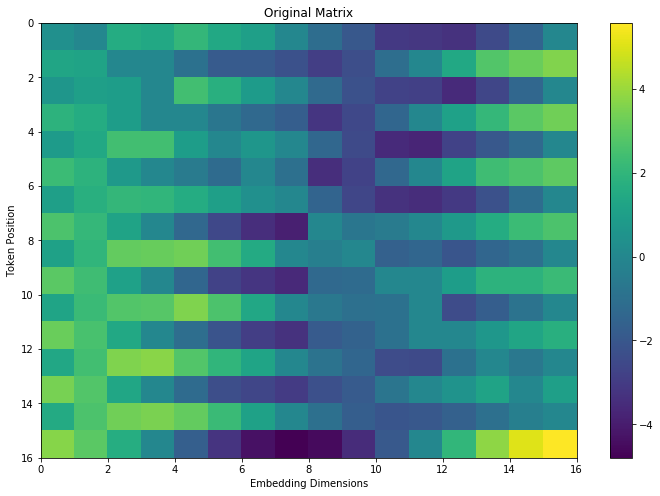

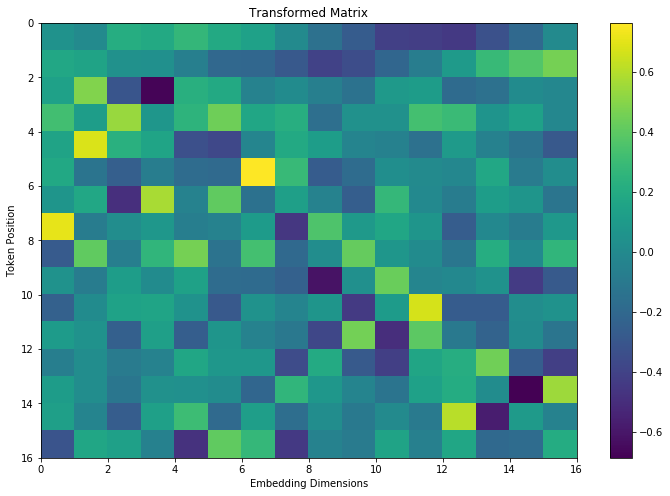

In [217]:
#Generate a colored visualization of vectors 1 and 2

#vector 1
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16, 0))
plt.ylabel('Token Position')
plt.title('Original Matrix')
plt.colorbar()
plt.show()

#vector 2
plt.figure(figsize=(12,8))
plt.pcolormesh(orth_pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16, 0))
plt.ylabel('Token Position')
plt.title('Transformed Matrix')
plt.colorbar()
plt.show()

In [218]:
#Check is the transformed matrix is orthogonal ? orthonormal?

og_flag = 0

#check if orthogonal
for x in range(16):
    for y in range(x):  
        if(np.isclose(np.dot(orth_pos_encoding[0,x], orth_pos_encoding[0,y]),0) == False):
            print("not orthogonal, not orthonormal")
            og_flag = 1
            break
    if (og_flag == 1):
        break

#check if orthonormal
if(og_flag == 0):
    for x in range(16):
        if(np.isclose(np.linalg.norm(orth_pos_encoding[0,x]),1) == False):
            print("orthogonal, not orthonormal")
            break
if(x == 15 ):
    print("orthogonal, orthonormal") 

orthogonal, orthonormal
